In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
df = pd.read_csv("water.csv")
df.head(100)
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
df.head(100)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


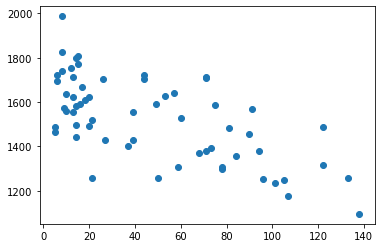

In [9]:
plt.scatter(df.hardness , df.mortality)

In [10]:
### Линейный коэфициент корреляция Пирсона ###
df[['hardness', 'mortality']].corr()


,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [11]:
### Коэфициент корреляция Спирмана ###
df[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [12]:
X0 = df[['hardness']].values
Y0 = df[['mortality']].values
X0_1 = sm.add_constant(X0)
model_1 = sm.OLS(Y0 , X0_1)
results_ = model_1.fit()

In [13]:
print(results_.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     44.30
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           1.03e-08
Time:                        17:20:20   Log-Likelihood:                -388.28
No. Observations:                  61   AIC:                             780.6
Df Residuals:                      59   BIC:                             784.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1676.3556     29.298     57.217      0.0

R-squared: 0.429

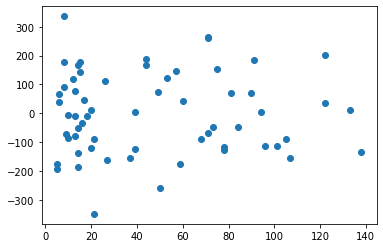

In [15]:
plt.scatter(X0_1[:, 1], results_.resid)

In [17]:
case1 = df['location'] == 'North'
case2 = df['location'] == 'South'
south = df.loc[case2]
north = df.loc[case1]

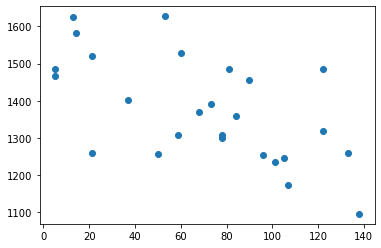

In [20]:
plt.scatter(south.hardness , south.mortality)

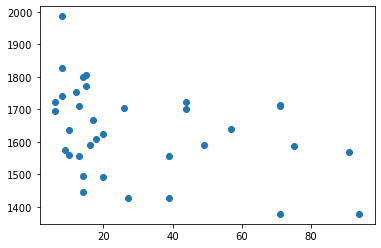

In [19]:
plt.scatter(north.hardness , north.mortality)

In [22]:
### Линейный коэфициент корреляция Пирсона ###
south[['hardness', 'mortality']].corr()


,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [21]:
### Линейный коэфициент корреляция Пирсона###
north[['hardness', 'mortality']].corr()


,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [26]:
### Коэфициент корреляция Спирмана ###
south[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [25]:
### Коэфициент корреляция Спирмана ###
north[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [32]:
X1 = south[['hardness']].values
Y1 = south[['mortality']].values
X1_1 = sm.add_constant(X1)
mode1_2 = sm.OLS(Y1 , X1_1)
results_1 = mode1_2.fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     13.65
Date:                Thu, 29 Oct 2020   Prob (F-statistic):            0.00113
Time:                        17:38:53   Log-Likelihood:                -159.06
No. Observations:                  26   AIC:                             322.1
Df Residuals:                      24   BIC:                             324.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1522.8150     45.431     33.519      0.0

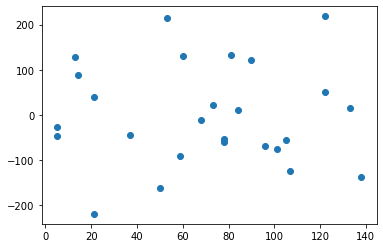

In [34]:
plt.scatter(X1_1[:, 1], results_1.resid)

In [37]:
X2 = north[['hardness']].values
Y2 = north[['mortality']].values
X2_1 = sm.add_constant(X2)
mode2_1 = sm.OLS(Y2 , X2_1)
results_2 = mode2_1.fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     5.188
Date:                Thu, 29 Oct 2020   Prob (F-statistic):             0.0293
Time:                        17:48:18   Log-Likelihood:                -218.78
No. Observations:                  35   AIC:                             441.6
Df Residuals:                      33   BIC:                             444.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1692.3128     33.785     50.091      0.0

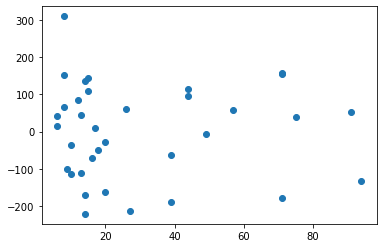

In [38]:
plt.scatter(X2_1[:, 1], results_2.resid)